<div style="text-align: center;">
# Topics in macroeconomics
<!-- # マクロ経済特論A -->
<div style="text-align: center;">
Two-period model and overview of numerical methods
<!-- 第2回：「2期間モデルと数値計算の概観」 -->
<br>
<br>
<div style="text-align: center;">    
September 2023
<!-- 2022年9月 -->
<div style="text-align: center;">   
Takeki Sunakawa
<!-- 一橋大学　砂川武貴 -->

# Understand when and what is needed
<!-- # 何がどこで必要なのかを理解しよう -->

- Explain the basic usage of numerical methods using a simple two-period model
<!-- - シンプルな2期間モデルを用いて、数値計算手法の基本的な使い方を説明 -->


- Judd (1998) Numerical Methods in Economics
    - Ch.4: Optimization
    - Ch.5: Solving nonlinear equations
    - Ch.6: Approximation methods
    - Ch.7: Numerical integral and differentiation
    
<!--     - 第4章：最適化(optimization)
    - 第5章：非線形方程式(nonlinear equations)の解法
    - 第6章：関数の近似法(approximation methods)
    - 第7章：数値積分と数値微分(numerical integral and differentiation)
 -->

- We will explain when and why the knowledge about each tool is needed by solving the model
<!-- - 今回は、実際にモデルを解きながら、各ツールに関する知識が「どこで、なぜ必要になってくるのか」について解説 -->

# Benchmark model and its calibration
<!-- # ベンチマークモデルとカリブレーション -->
## Two-period model
<!-- ## 2期間モデル -->

- Model consumption-saving behavior in the entire life of an economic agent
<!-- - ある経済主体の人生全体での消費・貯蓄行動をモデル化 -->

- The first period: Young, the second period: Old
<!-- - 前半：若年期（第1期）、後半：老年期（第2期） -->

- When young, work and get income $w$, then consume $c_{1}$ for today or save $a$ for tomorrow
<!-- - 若年期には働いて所得$w$を稼得、今期の消費$c_{1}$にあてるか、老後のための貯蓄$a$として取っておく -->


$$
  c_{1} + a = w \tag{1}
$$

- When old, cannot work therefore live with assets saved before. Saved assets have an interest $r$
<!-- - 老年期には働くことはできないため、若年期に蓄積した資産で生活。貯蓄した資産には$r$の金利がつく -->

- The economic agent dies for sure after the second period, and leaves no bequest: Consume all the assets
<!-- - 第2期に経済主体は必ず死亡し、遺産動機はない：全財産を消費に回す -->

$$
  c_{2} = (1+r)a \tag{2}
$$

- The economic agent chooses consumption and saving so as to maximize the lifetime utility
<!-- - 経済主体は人生全体の効用を最大化するように消費と貯蓄を選択する -->

$$
  U(c_1,c_2) = u(c_1) + \beta u(c_2)
$$

$\beta$ is called discount factor
<!-- $\beta$は割引因子(discount factor)と呼ばれる -->

- When $u'(c)>0$ and $u''(c)<0$ are satisfied, the economic agent wishes to smooth consumption, and determines consumption so that the following Euler equation is satisfied
<!-- - $u'(c)>0$及び$u''(c)<0$を満たす場合、経済主体は消費の平準化(consumption smoothing)を望み、以下のオイラー方程式(Euler equation)を満たすように消費を決定する -->

$$
  u'(c_1) = (1+r)\beta u'(c_2) \tag{3}
$$

- How to solve this simple two-period model?
<!-- - このシンプルな2期間モデルをどうやって解けば良いのであろうか？ -->

- Solving the model = deriving the following saving function
<!-- - モデルを「解く」＝以下の貯蓄関数を導出 -->

$$
  a = g(w)
$$

## Calibration
<!-- ## カリブレーション -->

- Specifying the utility function with Constant Relative Risk Aversion, CRRA
<!-- - 効用関数を「特定化」：相対的危険回避度一定(constant relative risk aversion, CRRA)型効用関数 -->

$$
  u(c) = \frac{c^{1-\gamma}-1}{1-\gamma}
$$

- $1/\gamma$ is the intertemporal elasticity of substitution
<!-- - $1/\gamma$は異時点間の代替の弾力性(intertemporal elasticity of substitution) -->

- When $\gamma \rightarrow 1$, $u(c)=\ln(c)$ holds by the L'Hopital's rule 
<!-- - $\gamma \rightarrow 1$のとき、ロピタルの法則(L'Hopital's rule)より、$u(c)=\ln(c)$ -->

In [1]:
function CRRA(cons, γ)
    if γ != 1.0
       return cons^(1.0 - γ) / (1.0 - γ) 
    else
       return log(cons)
    end
end

CRRA (generic function with 1 method)

- Calibration: Specifying the functional form and parameter values
<!-- - カリブレーション(calibration)：関数形を特定化してパラメータを定める一連の作業 -->
    - One period in the model amounts to thirty years. Therefore, the discount factor and interest rate are values for 30 years, not annual (Song et al., 2012)
<!-- - モデル上の1期間は30年。そのため、割引因子$\beta$と金利$r$は年率ではなく30年間の値(Song et al., 2012) -->
    - $\beta=0.985^{30}$
    - $1+r=1.025^{30}$
    - $\gamma=2$

In [2]:
β = 0.985^30
γ = 2.0
rent = 1.025^30 - 1.0

1.0975675790817858

## Characterization of closed-form solution
<!-- ## 解析的解の性質 -->

- In this case, we can derive the closed-form solution of the two-period model
<!-- - 2期間モデルの解析的解(closed-form solution)は、この場合手計算で導出できる -->

$$
  a = \frac{w}{1+(1+r)\{\beta(1+r)\}^{-1/\gamma}} \tag{4}
$$

# Discrete approximation and grid
<!-- # 離散近似とグリッド -->

- In the saving function $a=g(w)$, income $w$ and assets $a$ are both continuous
<!-- - 貯蓄関数$a=g(w)$において、所得$w$も資産$a$も連続(continuum) -->

- Computers cannot understand the concept of contunuum, therefore we need to discretize the variables
<!-- - コンピュータは連続という概念をそのままの形では理解できないため、変数を離散化(discretize)して考える -->

## Computation on grid
<!-- ## グリッド上で計算する -->

- Income in the young period can take: $w_{i}\in\{w_1,\dots,w_{I}\}$
<!-- - 若年期の所得$w$が取り得る値：$w_{i}\in\{w_1,\dots,w_{I}\}$ -->

- Set of these points: Grid or Node
<!-- - この点の集まり：グリッド(grid)あるいはノード(node) -->

- Each point: Grid point or Evaluation point 
<!-- - それぞれの点：グリッドポイント(grid point)あるいは評価点(evaluation point) -->

- Approximate $w$ by grid of $\{w_{i}\}_{i=1}^{I}, I=10$
<!-- - $w$を$\{w_{i}\}_{i=1}^{I}, I=10$個のグリッドで近似 -->

$$
  w_{i} \in \{0.1,0.2,0.3,\dots,1.0\}
$$

- The subscript $i$ shows what number in the grid
<!-- 添え字の$i$はグリッドの何番目の要素かを表している -->

- Note that we exclude $w=0$
<!-- $w=0$を含めないことに注意 -->

## State and control variables are both discrete
<!-- ## 状態変数と操作変数が共に離散の場合 -->

- State variable: $w$, Control variable: $a$
<!-- - ここでは、状態変数(state variable)：$w$、操作変数(control variable)：$a$ -->

- Discretize $a$ as well: Approximate $a$ by grid of $\{a_{j}\}_{j=1}^{J}, J=40$
<!-- - $a$についても離散化する：$a$を$\{a_{j}\}_{j=1}^{J}, J=40$個のグリッドで近似 -->

$$
  a_{j} \in \{0.025,0.05,0.075,0.1,\dots,1.0\}
$$

In [9]:
nw = 10 
w_max = 1.0
w_min = 0.1
na = 400
a_max = 1.0
a_min = 0.025

0.025

In [10]:
grid_w = collect(LinRange(w_min, w_max, nw))
grid_a = collect(LinRange(a_min, a_max, na))

println(grid_a)

[0.025, 0.027443609022556395, 0.02988721804511278, 0.03233082706766917, 0.03477443609022557, 0.037218045112781956, 0.03966165413533834, 0.042105263157894736, 0.04454887218045113, 0.046992481203007516, 0.04943609022556391, 0.0518796992481203, 0.05432330827067669, 0.056766917293233084, 0.05921052631578948, 0.061654135338345864, 0.06409774436090225, 0.06654135338345865, 0.06898496240601504, 0.07142857142857142, 0.07387218045112781, 0.07631578947368421, 0.0787593984962406, 0.08120300751879699, 0.08364661654135339, 0.08609022556390977, 0.08853383458646616, 0.09097744360902255, 0.09342105263157895, 0.09586466165413533, 0.09830827067669173, 0.10075187969924812, 0.1031954887218045, 0.1056390977443609, 0.1080827067669173, 0.11052631578947368, 0.11296992481203007, 0.11541353383458647, 0.11785714285714285, 0.12030075187969924, 0.12274436090225563, 0.12518796992481201, 0.12763157894736843, 0.13007518796992482, 0.1325187969924812, 0.1349624060150376, 0.13740601503759398, 0.13984962406015036, 0.1422

- The utility maximization problem of the entire life of an economic agent, regarding each $w_{i}$, is
<!-- - 経済主体の生涯にわたる効用最大化問題は、各$w_{i}$について、 -->

$$
  \max_{a_{j}\in\{a_{1},\dots,a_{J}\}} \frac{[w_{i}-a_{j}]^{1-\gamma}}{1-\gamma}+\beta\frac{[(1+r)a_{j}]^{1-\gamma}}{1-\gamma}
$$

As parameter values of $(\beta,r,\gamma)$ are already determined, if $w_{i}$ is given, $a_{j}$ is also determined
<!-- パラメータ$(\beta,r,\gamma)$についてはすでに値が定まっているので、$w_{i}$が与えられれば$a_{j}$も定まる -->

- The number of possible combinations is $10\times40=400$. For each $w_{i}$, compute $a_{j}$ which maximizes the lifetime utility by brute force
<!-- - 組み合わせの可能性は、$10\times40=400$通り。それぞれの$w_{i}$ごとに、40種類の$a_{j}$のどれが生涯効用を最大にするのかを「総当り」で計算 -->

In [11]:
# Define arrays (variables) beforehand
obj = zeros(na, nw) # Objective function

# Calculate the lifetime utility all the possible combinations of (w,a)

for i = 1:nw # for all w
    for j = 1:na # for all a
        cons = grid_w[i] - grid_a[j] # c1 = w - a
        if cons > 0.0
            obj[j, i] = CRRA(cons,γ) + β*　CRRA((1.0+rent)*grid_a[j],γ)
        else
            # If consumption is negative, give a penalty so that it will not be chosen
            obj[j,i] = -10000.0
        end
    end
end

- Figure 1(a): In each case of income in the young period $w_{i}=0.5,0.8,1.0$, compute the lifetime utility if saving for the old period is $a_{j}\in\{0.025,\dots,1.0\}$
<!-- - 図1(a)：若年期の所得が、$w_{i}=0.5,0.8,1.0$のそれぞれの場合に、老年期のための貯蓄が$a_{j}\in\{0.025,\dots,1.0\}$の値を取ったら生涯効用がいくらになるのかを計算 -->

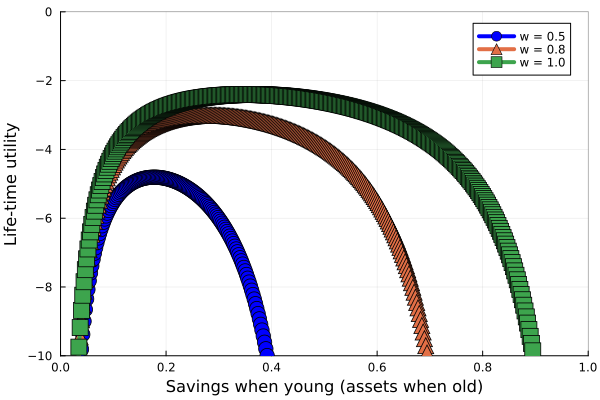

In [12]:
using Plots
# Figure 2.1(a)
plt = plot(grid_a, obj[:,5],
    color = :blue,
    marker = :circle,
    legend = :topright,
    xlims = (0, 1),
    ylims = (-10, 0),
    xlabel = ("Savings when young (assets when old)"),
    ylabel = ("Life-time utility"),
    label = ("w = 0.5"),
    linewidth = 4,
    markersize = 8,
#     titlefont = font("HackGen35Nerd", 12),
#     guidefont = font("HackGen35Nerd", 12),
#     tickfont = font("HackGen35Nerd", 8),
    framestyle = :semi
)
plot!(grid_a, obj[:,8], lw = 4, markershape=:utriangle, markersize = 8, label = "w = 0.8")
plot!(grid_a, obj[:,10], lw = 4, markershape=:rect, markersize = 8, label = "w = 1.0")

- After computing all the cases of $(w_{i},a_{j})$, find the maximized value and its location of the lifetime utility by using the max function
<!-- - $(w_{i},a_{j})$について全てのケースを計算したあと、MATLABであれば、max関数を用いて生涯効用の最大値の値と場所を探す -->

In [13]:
pol = zeros(nw) # Policy function

# Find a so as to maximize the lifetime utility for each w
for i in 1:nw
    maxv, maxl = findmax(obj[:,i]);
    pol[i] = grid_a[maxl];
end

- Figure 1(b): Combination of the optimal saving $a_{j}$ computed for each income $w_{i}$ in the young period = the saving function in the two-period model
<!-- - 図1(b)：若年期の所得$w_{i}$ごとに最適な貯蓄$a_{j}$を計算してつなげていった組み合わせ＝2期間モデルにおける貯蓄関数 -->

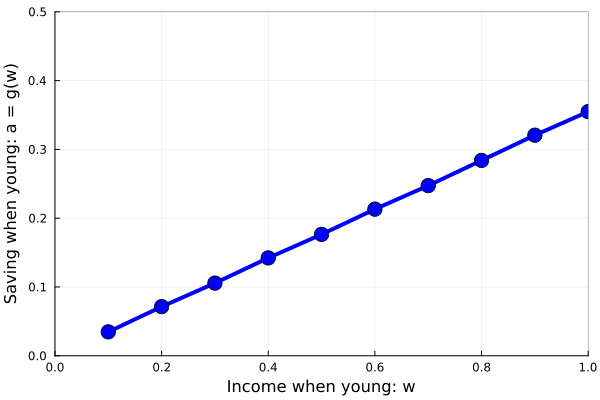

In [14]:
# Figure 2.1(b)
plt = plot(grid_w, pol,
    color = :blue,
    marker = :circle,
    legend = :none,
    xlims = (0, 1.0),
    ylims = (0, 0.5),
    xlabel = ("Income when young: w"),
    ylabel = ("Saving when young: a = g(w)"),
    linewidth = 4,
    markersize = 8,
#     titlefont = font("HackGen35Nerd", 12),
#     guidefont = font("HackGen35Nerd", 12),
#     tickfont = font("HackGen35Nerd", 8),
    framestyle = :semi
)

- You may feel it too primitive and simple, but it can be used for complex nonlinear models as well
<!-- - 原始的で単純過ぎるように感じるかもしれないが、実は複雑な非線形モデルにも使えるため侮れない -->

- However, computation takes time: If the number of state variable is two, the number of grid points is squared, not twiced (for example, $10^2=100$) if three, it is $10^3=1000$
<!-- - ただし、計算時間がかかる：状態変数の数が2種類になると、グリッドポイントの数は2倍ではなく2乗（例えば、$10^2=100$通り）。3種類になると$10^3=1000$通り -->

- This is called curse of dimensionality. As we have more state variables, the computation time exponentially increases.
<!-- - この性質を次元の呪い(curse of dimensionality)と呼ぶ。状態変数を増やすほど計算時間は指数的に増えていく -->